## Клиенты как Ключ к Росту: Стратегическая Сегментация

**Аналитическая задача** — Сегментация клиентской базы телекоммуникационной компании

### Задачи проекта:
- Анализ данных с целью выявления наиболее типичных групп клиентов.
- Разработка предложений, учитывающих потребности каждой группы.

### Описание данных:
Каждый клиент описывается следующим набором признаков:
- `Возраст`, `Среднемесячный расход`, `Средняя продолжительность разговоров`, `Звонков днем за месяц`, `Звонков вечером за месяц`, `Звонков ночью за месяц`, `Звонки в другие города`, `Звонки в другие страны`, `Доля звонков на стационарные телефоны`, `Количество SMS за месяц`, `Дата подключения тарифа`.

### План по выполнению проекта:

**Шаг 1.** Загрузка данных;

**Шаг 2.** Первичная обработка данных:
- корректировка заголовков
- корректировка типов признаков;
- проверить наличие дублирующихся записей;
- проверить наличие аномальных значений;
- восстановить пропущенные значения;

**Шаг 3.** Добавление новых переменных:
- по значениям признака `Возраст` введем новую переменную `Возрастная категория`, принимающую значения "студент", "аспирант", "бизнесмен" и "знаток" по следующую правилу:

$$
\text{Возрастная категория} = 
\left\{
\begin{array}{l}
\text{студент,} \quad \text{если Возраст } \in [19, 24];\\  
\text{аспирант,} \quad \text{если Возраст } \in [25, 33];\\
\text{бизнесмен,} \quad \text{если Возраст } \in [34, 56];\\
\text{знаток,} \quad \text{если Возраст } \in [57, 70].
\end{array}
\right.
$$ 

- по значениям признака `Дата подключения тарифа` создадим признаки: `Год подключения`, `Месяц подключения`, `Дата подключения`;  

**Шаг 3.** Исследовательский анализ данных:
- в разрезе значений признаков `Год подключения`, `Месяц подключения`, `Дата подключения` исследуем:
    - динамику подключения к тарифам (количество клиентов). Строим графики. В какой год и месяц подключались меньше/больше всего клиентов? Какие выводы можно сделать?
- в разрезе значений признака `Возрастная категория` исследуем распределение признаков `Среднемесячный расход`, `Средняя продолжительность разговоров`, `Звонков днем за месяц`, `Звонков вечером за месяц`, `Звонков ночью за месяц`, `Звонки в другие города`, `Доля звонков на стационарные телефоны`, `Количество SMS за месяц`. Для каждого из признаков рассчитаем выборочное среднее, медиану и моду. Строим графики. Какие выводы можно сделать о предпочтениях клиентов разных возрастных категорий в отношении используемых услуг (звонков и SMS; времени суток);
- клиенты каких возрастных категорий (ТОП-2):
  
    - больше всего в среднем в месяц тратят на оплату услуг связи;
    - больше всего тратят времени на общение в месяц днем, вечером и ночью;
    - больше всего по количеству звонков в месяц днем, вечером и ночью. Совпадают ли результаты с предыдущем пунктом;
Какие выводы можно сделать?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('dataset_telecom+(3).csv')
df.head()

,Возраст,Среднемесячный расход,Средняя продолжительность разговоров,Звонков днем за месяц,Звонков вечером за месяц,Звонков ночью за месяц,Звонки в другие города,Звонки в другие страны,Доля звонков на стационарные телефоны,Количество SMS за месяц,Дата подключения тарифа
0,24,NaN,2.4,12.0,65.0,5,0,0,5,56,2018-06-17 12:14:35
1,51,287.51,1.7,111.0,109.0,1,44,0,6,1,2021-10-21 15:39:54
2,41,113.70,2.1,41.0,27.0,0,0,0,1,36,2015-03-26 11:26:15
3,35,410.23,5.6,47.0,49.0,0,0,0,11,23,2016-01-04 15:53:20
4,26,537.60,4.8,58.0,77.0,4,0,0,16,29,2017-05-03 13:33:53


**Шаг 2.** Первичная обработка данных:
- корректировка заголовков
- корректировка типов признаков;
- проверить наличие дублирующихся записей;
- проверить наличие аномальных значений;
- восстановить пропущенные значения;

In [3]:
df.info()
df.describe()
df.columns;

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4492 entries, 0 to 4491
Data columns (total 11 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Возраст                                4492 non-null   int64  
 1   Среднемесячный расход                  4468 non-null   float64
 2   Средняя продолжительность разговоров   4475 non-null   float64
 3   Звонков днем за месяц                  4472 non-null   float64
 4   Звонков вечером за месяц               4489 non-null   float64
 5   Звонков ночью за месяц                 4492 non-null   object 
 6   Звонки в другие города                 4492 non-null   object 
 7   Звонки в другие страны                 4492 non-null   int64  
 8   Доля звонков на стационарные телефоны  4492 non-null   object 
 9   Количество SMS за месяц                4492 non-null   object 
 10  Дата подключения тарифа                4492 non-null   object 
dtypes: f

In [4]:
df.describe().T
per = [0.01, 0.05, 0.25, 0.5, 0.75, 0.95, 0.99]
df.describe(percentiles= per)
df.drop(columns=['Возраст', 'Звонки в другие города', 'Звонки в другие страны',
       'Доля звонков на стационарные телефоны', 'Дата подключения тарифа'])\
       .describe(percentiles= per)

,Среднемесячный расход,Средняя продолжительность разговоров,Звонков днем за месяц,Звонков вечером за месяц
count,4468.000000,4475.000000,4472.000000,4489.000000
mean,505.533577,4.230827,63.899374,70.363778
std,646.354693,3.005210,62.877394,41.219909
min,3.180000,0.100000,1.000000,1.000000
1%,7.790100,0.400000,2.000000,2.000000
5%,16.800000,1.100000,5.000000,4.000000
25%,152.490000,2.100000,37.000000,42.000000
50%,315.510000,3.300000,53.000000,71.000000
75%,599.840000,5.900000,68.000000,98.000000
95%,1610.304500,9.700000,133.000000,142.000000


In [5]:
# Работа с заголовками

df_columns_old = df.columns.copy()
#df.columns= df.columns.str.lower()
df.columns = ['age', 'avg_month_time', 'avg_call_time', 
              'month_day_time', 'month_evening_time', 'month_night_time',
              'out_city_call', 'out_country_call',
              'landline_call_perc', 'month_sms_count','activation_date']

dct_columns = dict(zip(df.columns, df_columns_old))
dct_columns


{'age': 'Возраст',
 'avg_month_time': 'Среднемесячный расход',
 'avg_call_time': 'Средняя продолжительность разговоров',
 'month_day_time': 'Звонков днем за месяц',
 'month_evening_time': 'Звонков вечером за месяц',
 'month_night_time': 'Звонков ночью за месяц',
 'out_city_call': 'Звонки в другие города',
 'out_country_call': 'Звонки в другие страны',
 'landline_call_perc': 'Доля звонков на стационарные телефоны',
 'month_sms_count': 'Количество SMS за месяц',
 'activation_date': 'Дата подключения тарифа'}

In [6]:
# Изменение типов данных / ошибки ввода данных.

df = df.astype({'month_night_time' : 'float64', 'out_city_call' : 'float64',
                'landline_call_perc' : 'float64', 'month_sms_count' : 'float64',
                'activation_date' : 'datetime64[ns]'}, errors='ignore')

df["month_night_time"] = df["month_night_time"].replace(r"'","", regex=True)
df["out_city_call"] = df["out_city_call"].replace(r"'","", regex=True)
df["landline_call_perc"] = df["landline_call_perc"].replace(r"'","", regex=True)
df["month_sms_count"] = df["month_sms_count"].replace(r"'","", regex=True)

df = df.astype({'month_night_time' : 'float64',
                'out_city_call' : 'float64',
                'landline_call_perc' : 'float64',
                'month_sms_count' : 'float64'
                }, errors='ignore')

df.dtypes;

In [ ]:
# Дублирующиеся записи

df.duplicated().sum()   # 0

np.int64(0)

In [8]:
# Пропущенные значения

df.isna().sum() 
df.dropna(inplace = True)   
df.isna().sum().sum()  

np.int64(0)

In [ ]:
# Проверка внесенных изменений
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3769 entries, 0 to 3768
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   age                 3769 non-null   int64         
 1   avg_month_time      3769 non-null   float64       
 2   avg_call_time       3769 non-null   float64       
 3   month_day_time      3769 non-null   float64       
 4   month_evening_time  3769 non-null   float64       
 5   month_night_time    3769 non-null   float64       
 6   out_city_call       3769 non-null   float64       
 7   out_country_call    3769 non-null   int64         
 8   landline_call_perc  3769 non-null   float64       
 9   month_sms_count     3769 non-null   float64       
 10  activation_date     3769 non-null   datetime64[ns]
 11  age_category        3769 non-null   object        
 12  activation_year     3769 non-null   int32         
 13  activation_month    3769 non-null   datetime64[n

Поиск аномалий

In [10]:
def calc_boxplot(df_col : pd.Series) -> tuple:

    """
    Функция для расчета значений нижнего и верхнего усов.
    На вход подается столбец датафрейма,
    на выходе кортеж: первый элемент -- нижний ус, второй элемент -- верхний ус
    """

    Q1, median, Q3 = np.percentile(np.asarray(df_col.dropna()), [25, 50, 75])
    IQR = Q3 - Q1
    loval = Q1 - 1.5 * IQR
    hival = Q3 + 1.5 * IQR
    wiskhi = np.compress(np.asarray(df_col.dropna()) <= hival, np.asarray(df_col.dropna()))
    wisklo = np.compress(np.asarray(df_col.dropna()) >= loval, np.asarray(df_col.dropna()))
    actual_hival = np.max(wiskhi)
    actual_loval = np.min(wisklo)
    return actual_loval, actual_hival #(нижний ус, верхний ус)

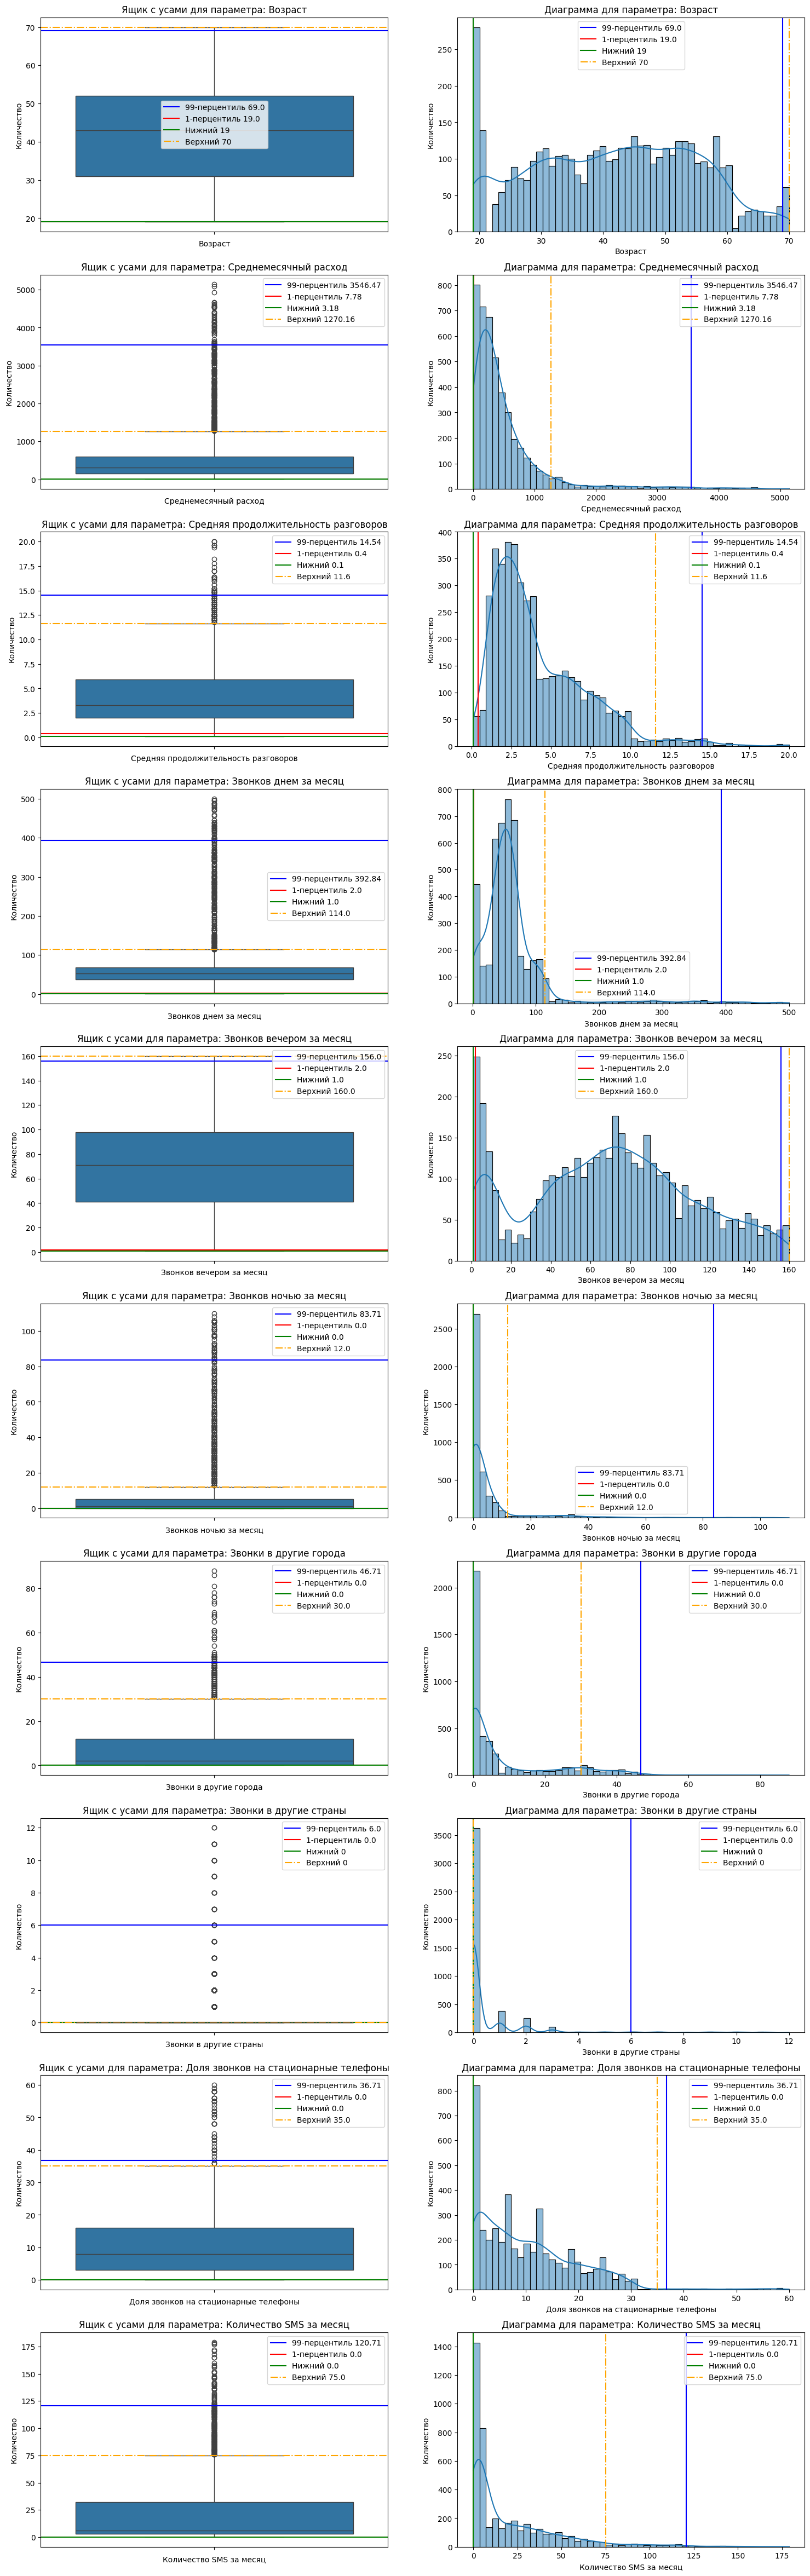

In [11]:
lst_col = ['age', 'avg_month_time', 'avg_call_time', 'month_day_time',
       'month_evening_time', 'month_night_time', 'out_city_call',
       'out_country_call', 'landline_call_perc', 'month_sms_count']

plt.subplots(10,2, figsize=(18, 60))
for index, col in enumerate(lst_col):
    plt.subplot(10, 2, 2*index+1)
    ax = sns.boxplot(data=df,
                y=col)
    ax.set_xlabel(f'{dct_columns[col]}')
    ax.set_ylabel('Количество')
    ax.set_title(f'Ящик с усами для параметра: {dct_columns[col]}')

    per_99 = np.round(np.nanpercentile(df[col], 99), 2)
    ax.axhline(per_99,
            color='blue',
            label=f"99-перцентиль {per_99}")
    
    per_01 = np.round(np.nanpercentile(df[col], 1), 2)
    ax.axhline(per_01,
            color='red',
            label=f"1-перцентиль {per_01}")

    actual_loval, actual_hival = calc_boxplot(df[col])

    ax.axhline(actual_loval,
            color='green',
            label=f"Нижний {actual_loval}")

    ax.axhline(actual_hival,
            color='orange',
            label=f"Верхний {actual_hival}",
            linestyle='dashdot')
   
    plt.legend()

    plt.subplot(10, 2, 2*index+2)
    # столбцая диаграмма
    ax = sns.histplot(df[col],
                bins=50,
                kde=True)
    ax.set_xlabel(f'{dct_columns[col]}')
    ax.set_ylabel('Количество')
    ax.set_title(f'Диаграмма для параметра: {dct_columns[col]}')

    per_99 = np.round(np.nanpercentile(df[col], 99), 2)
    ax.axvline(per_99,
            color='blue',
            label=f"99-перцентиль {per_99}")
    
    per_01 = np.round(np.nanpercentile(df[col], 1), 2)
    ax.axvline(per_01,
            color='red',
            label=f"1-перцентиль {per_01}")

    actual_loval, actual_hival = calc_boxplot(df[col])

    ax.axvline(actual_loval,
            color='green',
            label=f"Нижний {actual_loval}")

    ax.axvline(actual_hival,
            color='orange',
            label=f"Верхний {actual_hival}",
            linestyle='dashdot')
    plt.legend()

In [12]:
flt = ((df['age'].between(calc_boxplot(df['age'])[0],calc_boxplot(df['age'])[1]))
      & (df['avg_month_time'].between(calc_boxplot(df['avg_month_time'])[0],
                                                   np.nanpercentile(df['avg_month_time'], 99)))
      & (df['avg_call_time'].between(calc_boxplot(df['avg_call_time'])[0],
                                          np.nanpercentile(df['avg_call_time'], 99)))
      & (df['month_day_time'].between(calc_boxplot(df['month_day_time'])[0],
                                          calc_boxplot(df['month_day_time'])[1]))
      & (df['month_evening_time'].between(calc_boxplot(df['month_evening_time'])[0],
                                                   calc_boxplot(df['month_evening_time'])[1]))
      & (df['month_night_time'].between(calc_boxplot(df['month_night_time'])[0],
                                          calc_boxplot(df['month_night_time'])[1]))
      & (df['out_city_call'].between(calc_boxplot(df['out_city_call'])[0],
                                          np.nanpercentile(df['out_city_call'], 99)))
      & (df['out_country_call'].between(calc_boxplot(df['out_country_call'])[0],
                                                   np.nanpercentile(df['out_country_call'], 99)))
      & (df['landline_call_perc'].between(calc_boxplot(df['landline_call_perc'])[0],
                                          calc_boxplot(df['landline_call_perc'])[1]))
      & (df['month_sms_count'].between(calc_boxplot(df['month_sms_count'])[0],
                                         np.nanpercentile(df['month_sms_count'], 99))))
      

In [13]:
1 - df[flt].shape[0]/df.shape[0]
print(f'Процент потерь {(1 - df[flt].shape[0] / df.shape[0]):.2%}')

Процент потерь 13.18%


In [14]:
df = df[df['age'].between(calc_boxplot(df['age'])[0],
                                          calc_boxplot(df['age'])[1])]  
df = df[df['avg_month_time'].between(calc_boxplot(df['avg_month_time'])[0],
                                                   np.nanpercentile(df['avg_month_time'], 99))]  
df = df[df['avg_call_time'].between(calc_boxplot(df['avg_call_time'])[0],
                                          np.nanpercentile(df['avg_call_time'], 99))]
df = df[df['month_day_time'].between(calc_boxplot(df['month_day_time'])[0],
                                          calc_boxplot(df['month_day_time'])[1])]
df = df[df['month_evening_time'].between(calc_boxplot(df['month_evening_time'])[0],
                                                   calc_boxplot(df['month_evening_time'])[1])]
df = df[df['month_night_time'].between(calc_boxplot(df['month_night_time'])[0],
                                          calc_boxplot(df['month_night_time'])[1])]
df = df[df['out_city_call'].between(calc_boxplot(df['out_city_call'])[0],
                                          np.nanpercentile(df['out_city_call'], 99))]
df = df[df['out_country_call'].between(calc_boxplot(df['out_country_call'])[0],
                                                   np.nanpercentile(df['out_country_call'], 99))]
df = df[df['landline_call_perc'].between(calc_boxplot(df['landline_call_perc'])[0],
                                          calc_boxplot(df['landline_call_perc'])[1])]
df = df[df['month_sms_count'].between(calc_boxplot(df['month_sms_count'])[0],
                                          np.nanpercentile(df['month_sms_count'], 99))]

df.shape

(3769, 11)

In [48]:
df.describe().T;


**Шаг 3.** Добавление новых переменных:
- по значениям признака `Возраст` введем новую переменную `Возрастная категория`, принимающую значения "студент", "аспирант", "бизнесмен" и "знаток" по следующую правилу:

$$
\text{Возрастная категория} = 
\left\{
\begin{array}{l}
\text{студент,} \quad \text{если Возраст } \in [19, 24];\\  
\text{аспирант,} \quad \text{если Возраст } \in [25, 33];\\
\text{бизнесмен,} \quad \text{если Возраст } \in [34, 56];\\
\text{знаток,} \quad \text{если Возраст } \in [57, 70].
\end{array}
\right.
$$ 

- по значениям признака `Дата подключения тарифа` создадим признаки: `Год подключения`, `Месяц подключения`, `Дата подключения`;  

In [16]:
def get_category(n):
    if 19 <= n < 25:
        return 'студент'
    elif 25 <= n < 34:
        return 'аспирант'
    elif 34  <= n < 57:
        return 'бизнесмен'
    elif 57  <= n < 71:
        return 'знаток'

get_category(25) 

df['age_category'] = df['age'].apply(get_category)
df;

In [17]:
df.index = range(0, 3769)

In [18]:
df['activation_year'] = df['activation_date'].dt.year   
df['activation_month'] = df['activation_date'].dt.strftime("%Y-%m")  
df['activation_data'] = df['activation_date'].dt.strftime("%Y-%m-%d")  

df = df.astype({'activation_month' : 'datetime64[ns]',
                'activation_data' : 'datetime64[ns]'}, 
                errors='ignore')
df.dtypes

age                            int64
avg_month_time               float64
avg_call_time                float64
month_day_time               float64
month_evening_time           float64
month_night_time             float64
out_city_call                float64
out_country_call               int64
landline_call_perc           float64
month_sms_count              float64
activation_date       datetime64[ns]
age_category                  object
activation_year                int32
activation_month      datetime64[ns]
activation_data       datetime64[ns]
dtype: object

In [19]:
df.head(2)

,age,avg_month_time,avg_call_time,month_day_time,month_evening_time,month_night_time,out_city_call,out_country_call,landline_call_perc,month_sms_count,activation_date,age_category,activation_year,activation_month,activation_data
0,41,113.70,2.1,41.0,27.0,0.0,0.0,0,1.0,36.0,2015-03-26 11:26:15,бизнесмен,2015,2015-03-01,2015-03-26
1,35,410.23,5.6,47.0,49.0,0.0,0.0,0,11.0,23.0,2016-01-04 15:53:20,бизнесмен,2016,2016-01-01,2016-01-04


**Шаг 4.** Исследовательский анализ данных:
- в разрезе значений признаков `Год подключения`, `Месяц подключения`, `Дата подключения` исследуем:
    - динамику подключения к тарифам (количество клиентов). Строим графики. В какой год и месяц подключались меньше/больше всего клиентов? Какие выводы можно сделать?

In [20]:
lst_date = ['activation_year', 'activation_month', 'activation_data']

for col in lst_date:
    df_col = df.groupby(col).agg(count_clients= ('age_category', 'count'))\
                           .reset_index()\
                           .sort_values(by='count_clients', ascending=False)
    display(f'--- Максимум ---')
    display(df_col[[col, 'count_clients']].head(1))
    display(f'--- Минимум ---')
    display(df_col[[col, 'count_clients']].tail(1))
df;

'--- Максимум ---'

,activation_year,count_clients
2,2017,570


'--- Минимум ---'

,activation_year,count_clients
0,2015,485


'--- Максимум ---'

,activation_month,count_clients
19,2016-08-01,59


'--- Минимум ---'

,activation_month,count_clients
0,2015-01-01,26


'--- Максимум ---'

,activation_data,count_clients
27,2015-02-09,7


'--- Минимум ---'

,activation_data,count_clients
19,2015-01-29,1


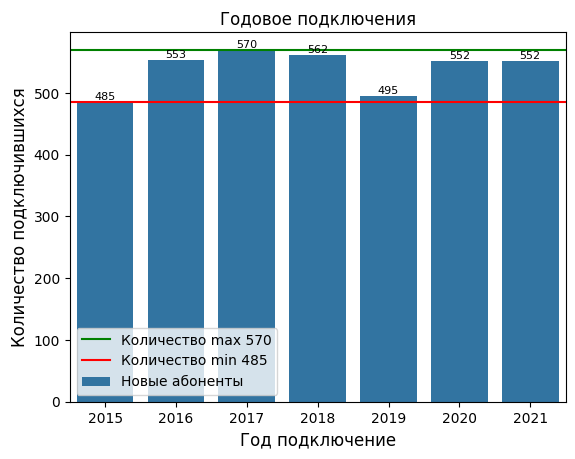

In [21]:
df_year = df.groupby('activation_year').agg(count_clients= ('age_category', 'count'))\
                                        .reset_index()\
                                        .sort_values(by='count_clients',
                                                     ascending=False)
ax = sns.countplot(x=df['activation_year'],
                   label = 'Новые абоненты'
                   )

ax.bar_label(ax.containers[0], label_type='edge', fontsize = 8)

plt.xlabel('Год подключение', fontsize=12)
plt.ylabel('Количество подключившихся', fontsize=12)
plt.title('Годовое подключения')

ax.axhline(df_year['count_clients'].max(),
           color='green',
           label=f"Количество max {df_year['count_clients'].max()}"
          )
ax.axhline(df_year['count_clients'].min(),
           color='red',
           label=f"Количество min {df_year['count_clients'].min()}",
           )
   
plt.legend()

In [22]:
df_month = df.groupby('activation_month').agg(count_clients= ('age_category', 'count'))\
                                        .reset_index()\
                                        .sort_values(by='count_clients',
                                                     ascending=False)
df_month_frec = df_month.groupby('count_clients').agg(quantity= ('activation_month', 'count')).reset_index()

In [23]:
df.head(2);

C:\Users\Анюта\AppData\Local\Temp\ipykernel_17908\1048802154.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),
C:\Users\Анюта\AppData\Local\Temp\ipykernel_17908\1048802154.py:46: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(),


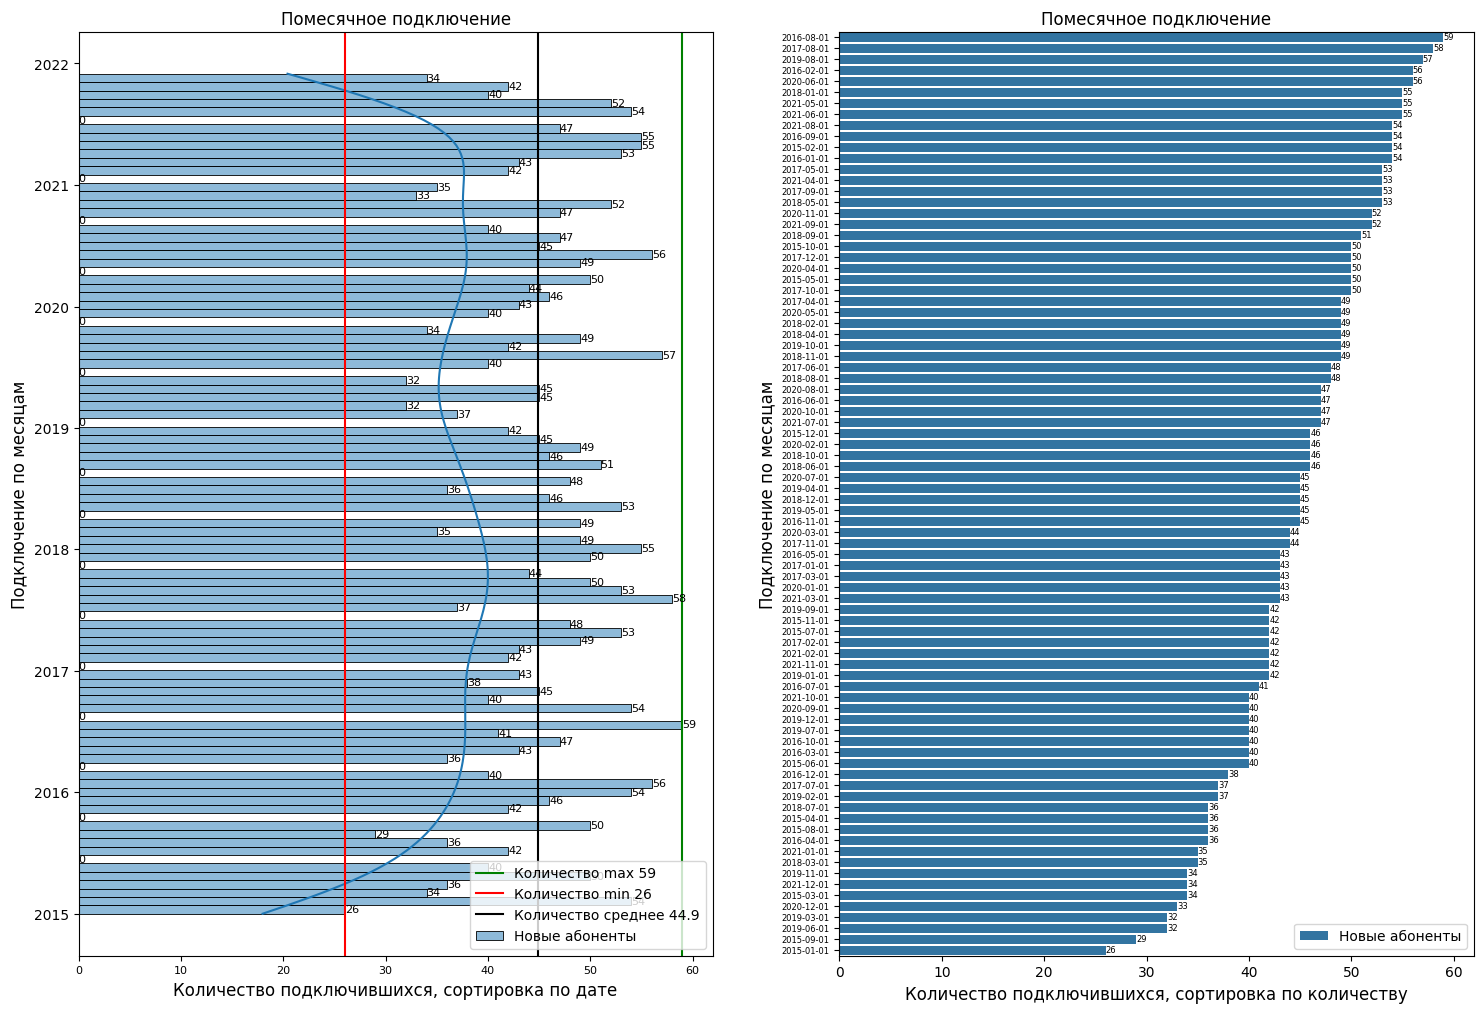

In [24]:
plt.subplots(1, 2, figsize = (18,12))

plt.subplot(1, 2,1)
ax = sns.histplot(data=df_month,
                  y=df['activation_month'], 
                  bins=100,
                  label = 'Новые абоненты',
                  kde=True
                   )
ax.bar_label(ax.containers[0], label_type='edge', fontsize = 8)

plt.ylabel('Подключение по месяцам', fontsize=12)
plt.xlabel('Количество подключившихся, сортировка по дате', fontsize=12)
plt.title('Помесячное подключение')

ax.axvline(df_month['count_clients'].max(),
           color='green',
           label=f"Количество max {df_month['count_clients'].max()}"
          )
ax.axvline(df_month['count_clients'].min(),
           color='red',
           label=f"Количество min {df_month['count_clients'].min()}"
           )

ax.axvline(df_month['count_clients'].mean().round(1),
           color='black',
           label=f"Количество среднее {df_month['count_clients'].mean().round(1)}"
           )

ax.set_xticklabels(ax.get_xticklabels(), 
                   fontsize = 8)
plt.legend()

plt.subplot(1, 2, 2)
ax = sns.barplot(data=df_month,
                    y=df_month['activation_month'],
                    x = df_month['count_clients'],
                    label = 'Новые абоненты'                    
                   )
ax.bar_label(ax.containers[0], label_type='edge', fontsize = 6)

plt.ylabel('Подключение по месяцам', fontsize=12)
plt.xlabel('Количество подключившихся, сортировка по количеству', fontsize=12)
plt.title('Помесячное подключение')

ax.set_yticklabels(ax.get_yticklabels(), 
                   fontsize = 6)
plt.legend()

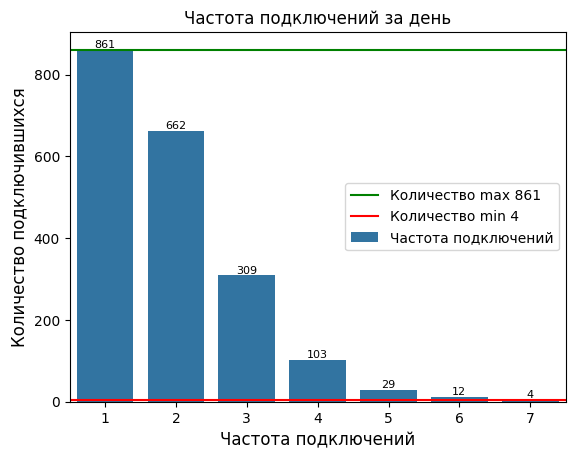

In [25]:
df_data = df.groupby('activation_data').agg(count_clients= ('age_category', 'count'))\
                                        .reset_index()\
                                        .sort_values(by='count_clients',
                                                     ascending=False)

df_data_frec = df_data.groupby('count_clients').agg(quantity= ('activation_data', 'count'))\
                                               .reset_index()
df_data_frec

ax = sns.barplot(data=df_data_frec,
                    x=df_data_frec['count_clients'],
                    y = df_data_frec['quantity'],
                    label = 'Частота подключений'
                   )
ax.bar_label(ax.containers[0], label_type='edge', fontsize = 8)

plt.xlabel('Частота подключений', fontsize=12)
plt.ylabel('Количество подключившихся', fontsize=12)
plt.title('Частота подключений за день')

ax.axhline(df_data_frec['quantity'].max(),
           color='green',
           label=f"Количество max {df_data_frec['quantity'].max()}"
          )
ax.axhline(df_data_frec['quantity'].min(),
           color='red',
           label=f"Количество min {df_data_frec['quantity'].min()}",
           )

plt.legend()

In [26]:
df_lst = [df_year, df_month, df_data]

for df_name in df_lst:
    display(f'min {df_name.iloc[ df_name.shape[0]-1]}')
    display(f'max {df_name.iloc[0]}')

'min activation_year    2015\ncount_clients       485\nName: 0, dtype: int64'

'max activation_year    2017\ncount_clients       570\nName: 2, dtype: int64'

'min activation_month    2015-01-01 00:00:00\ncount_clients                        26\nName: 0, dtype: object'

'max activation_month    2016-08-01 00:00:00\ncount_clients                        59\nName: 19, dtype: object'

'min activation_data    2015-01-29 00:00:00\ncount_clients                        1\nName: 19, dtype: object'

'max activation_data    2015-02-09 00:00:00\ncount_clients                        7\nName: 27, dtype: object'

In [27]:
df.head(2)

,age,avg_month_time,avg_call_time,month_day_time,month_evening_time,month_night_time,out_city_call,out_country_call,landline_call_perc,month_sms_count,activation_date,age_category,activation_year,activation_month,activation_data
0,41,113.70,2.1,41.0,27.0,0.0,0.0,0,1.0,36.0,2015-03-26 11:26:15,бизнесмен,2015,2015-03-01,2015-03-26
1,35,410.23,5.6,47.0,49.0,0.0,0.0,0,11.0,23.0,2016-01-04 15:53:20,бизнесмен,2016,2016-01-01,2016-01-04


##### Выводы
Как правило, за год совершается 500-520 подключений, исключение составил 2017 год, когда подключились 570 абонентов.   
Обычно в день подключается 1-2 новых клиента, максимальное количество подключений не превышаем 10 за день.   
В течение года наблюдается плавающий характер добавления новых абонентов.

- в разрезе значений признака `Возрастная категория` исследуем распределение признаков `Среднемесячный расход`, `Средняя продолжительность разговоров`, `Звонков днем за месяц`, `Звонков вечером за месяц`, `Звонков ночью за месяц`, `Звонки в другие города`, `Доля звонков на стационарные телефоны`, `Количество SMS за месяц`. Для каждого из признаков рассчитаем выборочное среднее, медиану и моду. Строим графики. Какие выводы можно сделать о предпочтениях клиентов разных возрастных категорий в отношении используемых услуг (звонков и SMS; времени суток);


In [28]:
df.columns

Index(['age', 'avg_month_time', 'avg_call_time', 'month_day_time',
       'month_evening_time', 'month_night_time', 'out_city_call',
       'out_country_call', 'landline_call_perc', 'month_sms_count',
       'activation_date', 'age_category', 'activation_year',
       'activation_month', 'activation_data'],
      dtype='object')

In [29]:
lst_cont = ['avg_month_time', 'avg_call_time', 'month_day_time',
            'month_evening_time', 'month_night_time', 'out_city_call',
            'out_country_call', 'landline_call_perc', 'month_sms_count']

In [30]:
df.groupby('age_category')[lst_cont]\
                            .agg(['mean', 'median', pd.Series.mode]).round(1).T

age_category              аспирант бизнесмен знаток  \
avg_month_time     mean      414.6     373.4  287.6   
                   median    341.2     311.2  195.7   
                   mode     267.54     13.92   16.8   
avg_call_time      mean        4.0       3.8    3.3   
                   median      3.5       3.2    2.7   
                   mode        1.1       1.7    2.5   
month_day_time     mean       57.8      52.1   39.5   
                   median     55.0      53.0   42.0   
                   mode       55.0      62.0    5.0   
month_evening_time mean       75.6      66.6   50.5   
                   median     74.0      66.0   45.0   
                   mode       57.0       4.0    3.0   
month_night_time   mean        1.7       1.5    1.0   
                   median      1.0       0.0    0.0   
                   mode        0.0       0.0    0.0   
out_city_call      mean        8.8       8.3    5.1   
                   median      2.0       1.0    0.0   
                   mode        0.0       0.0    0.0   
out_country_call   mean        0.3       0.3    0.2   
                   median      0.0       0.0    0.0   
                   mode          0         0      0   
landline_call_perc mean       11.9      10.6    9.4   
                   median     11.0      10.0    7.0   
                   mode        0.0       0.0    4.0   
month_sms_count    mean       26.6      12.4    2.4   
                   median     23.0       4.0    3.0   
                   mode       14.0       0.0    3.0   

age_category                                                    студент  
avg_month_time     mean                                           174.7  
                   median                                         129.0  
                   mode    [17.96, 24.08, 29.81, 106.75, 108.54, 127.4]  
avg_call_time      mean                                             2.5  
                   median                                           2.3  
                   mode                                             3.0  
month_day_time     mean                                            33.3  
                   median                                          35.0  
                   mode                              [32.0, 35.0, 37.0]  
month_evening_time mean                                            67.5  
                   median                                          70.0  
                   mode                                    [74.0, 77.0]  
month_night_time   mean                                             5.0  
                   median                                           6.0  
                   mode                                             0.0  
out_city_call      mean                                             0.5  
                   median                                           0.0  
                   mode                                             0.0  
out_country_call   mean                                             0.1  
                   median                                           0.0  
                   mode                                               0  
landline_call_perc mean                                             3.6  
                   median                                           3.0  
                   mode                                             0.0  
month_sms_count    mean                                            42.8  
                   median                                          39.0  
                   mode                                            31.0

In [31]:
df.pivot_table (index= 'age_category', 
                values= lst_cont, 
                aggfunc= ['mean', 'median', pd.Series.mode]).round(1).T;

In [32]:
for col in df.columns:
    if col in lst_cont:    
        mode = df.groupby("age_category")[col].agg(pd.Series.mode)
        #print(mode[0])

   #x_mode = df[col].mode()[0]

In [33]:
#df_asp = df[df['age_category']== "аспирант"]
#df_buis = df[df['age_category']== "бизнесмен"]
#df_clever = df[df['age_category']== "знаток"]
#df_stud = df[df['age_category']== "студент"]

#df_lst_categ = [df_asp, df_buis, df_clever, df_stud]
#dct_cat = dict.fromkeys(df_lst_categ, 0)

#for 
#for df in df_lst_categ:
#    for col in df.columns:
#        if col in lst_cont:    
#            mode = df[col].mode()[0]
#            display(f'{mode}')

C:\Users\Анюта\AppData\Local\Temp\ipykernel_17908\2328718621.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


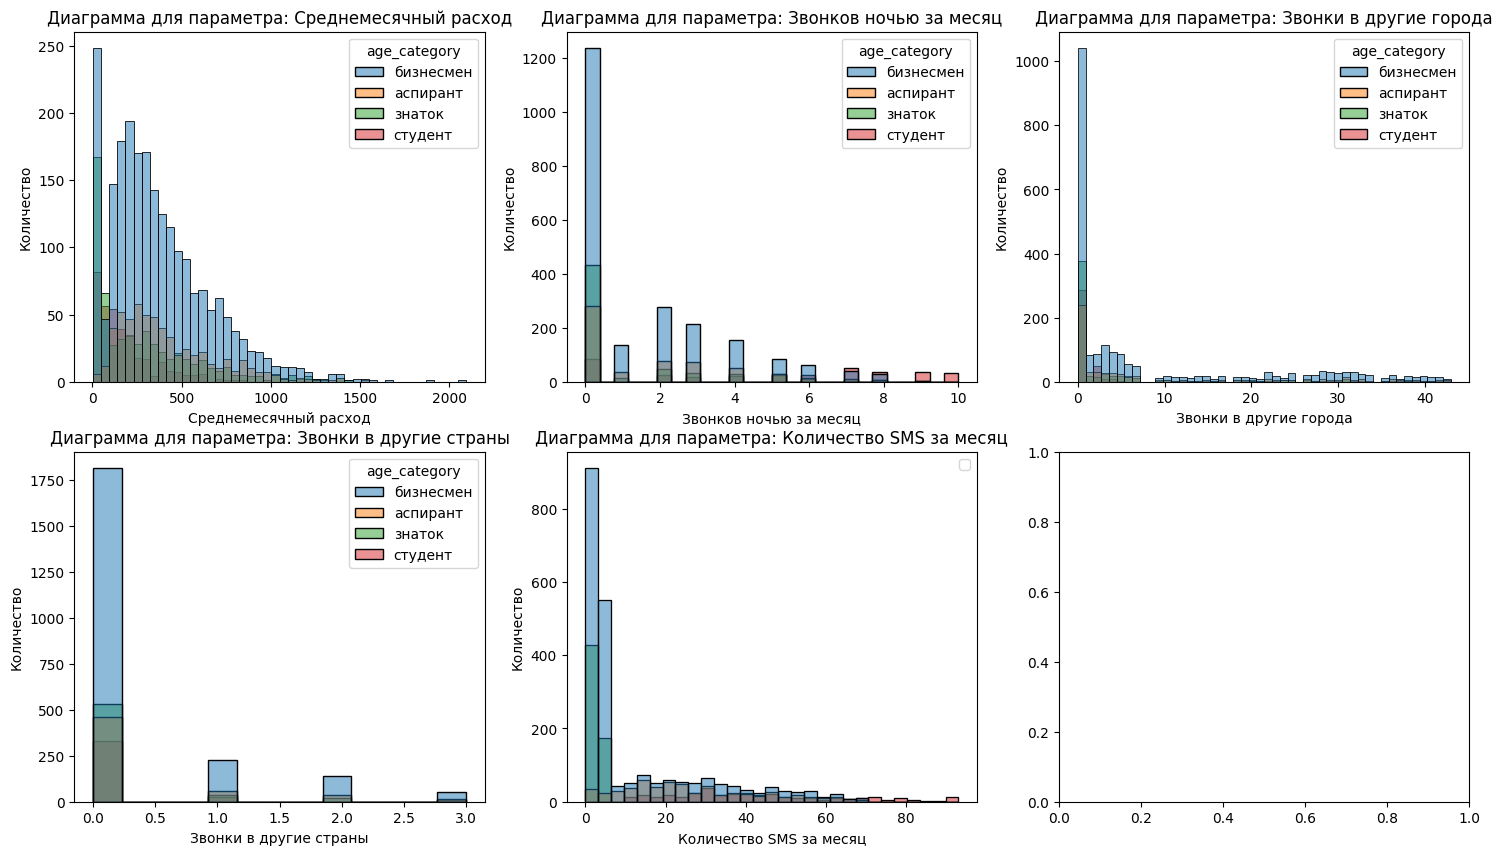

In [34]:
lst_cont_1 = ['avg_month_time', 'month_night_time', 'out_city_call',
               'out_country_call', 'month_sms_count']


plt.subplots(2,3, figsize = (18,10))

for index, col in enumerate(lst_cont_1, start = 1):
    plt.subplot(2,3, index)
    ax = sns.histplot(data=df,
                      x=df[col],
                      hue = df['age_category']
                      )

    ax.set_xlabel(f'{dct_columns[col]}')
    ax.set_ylabel('Количество')
    ax.set_title(f'Диаграмма для параметра: {dct_columns[col]}')

plt.legend()

C:\Users\Анюта\AppData\Local\Temp\ipykernel_17908\3347778498.py:21: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


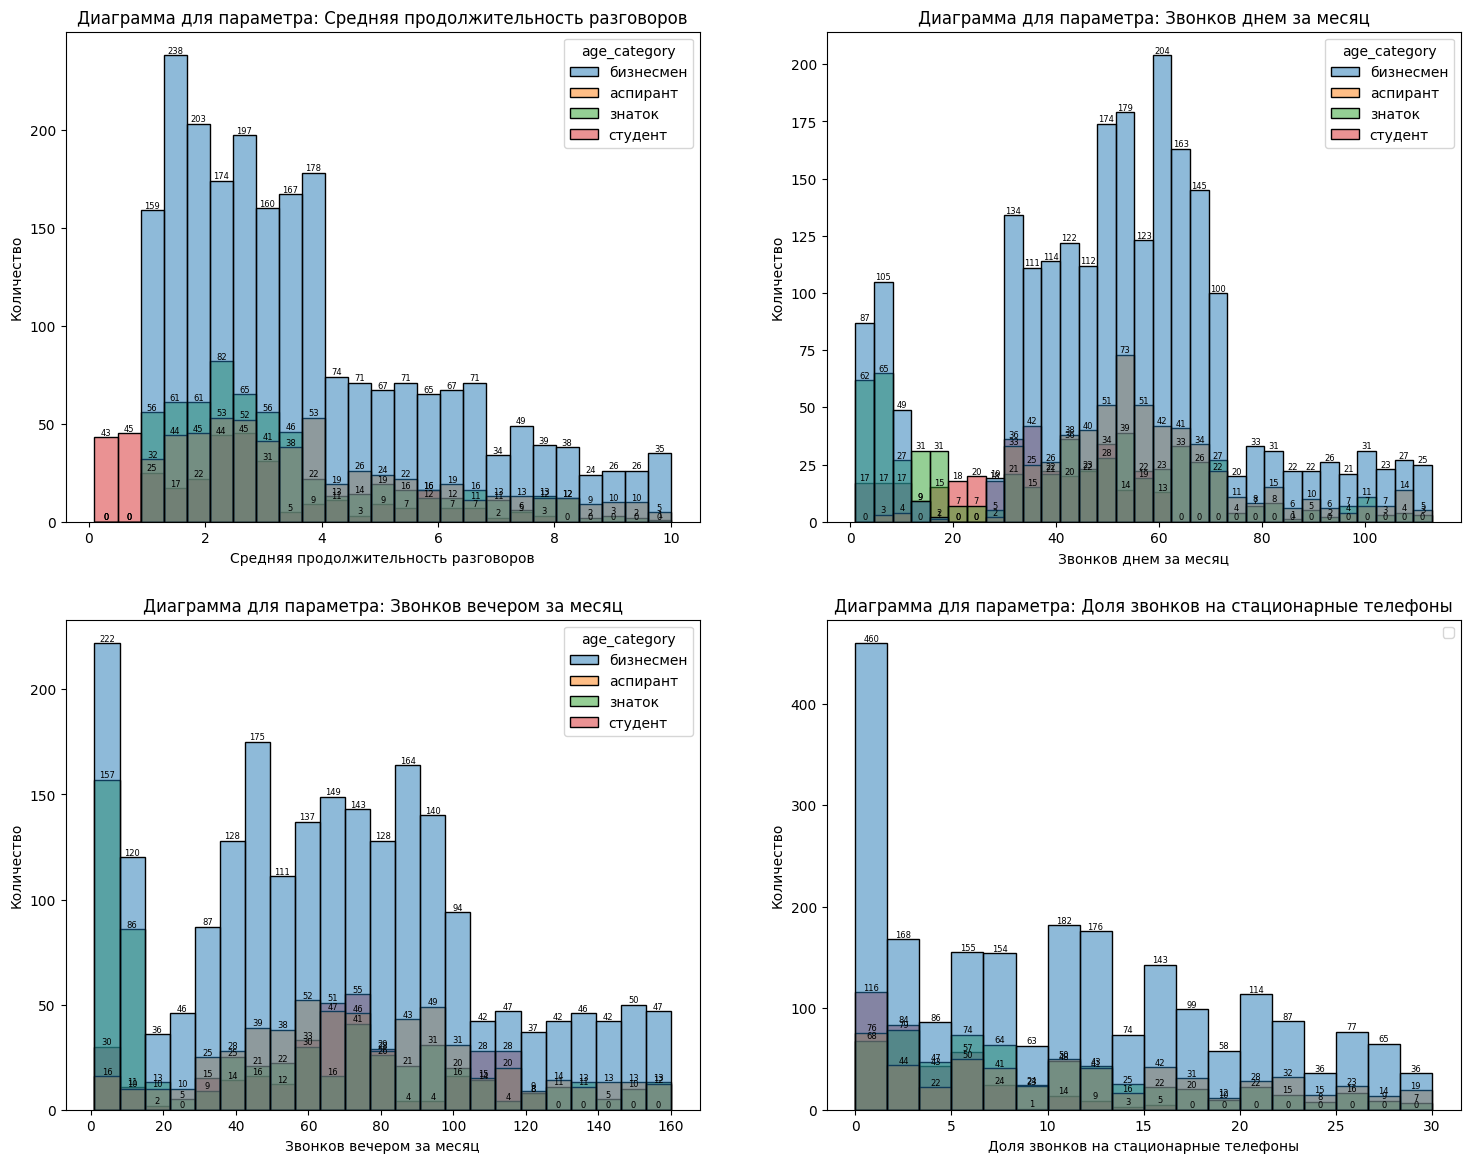

In [35]:
lst_cont_2 = ['avg_call_time',  'month_day_time',
              'month_evening_time', 'landline_call_perc']
plt.subplots(2,2, figsize = (18,14))

for index, col in enumerate(lst_cont_2, start = 1):
    plt.subplot(2, 2, index)
    ax = sns.histplot(data=df,
                      x=df[col],
                      hue = df['age_category']                      
                      )

    ax.set_xlabel(f'{dct_columns[col]}')
    ax.set_ylabel('Количество')
    ax.set_title(f'Диаграмма для параметра: {dct_columns[col]}')

    ax.bar_label(ax.containers[0], label_type='edge', fontsize = 6)
    ax.bar_label(ax.containers[1], label_type='edge', fontsize = 6)
    ax.bar_label(ax.containers[2], label_type='edge', fontsize = 6)
    ax.bar_label(ax.containers[3], label_type='edge', fontsize = 6)

plt.legend()

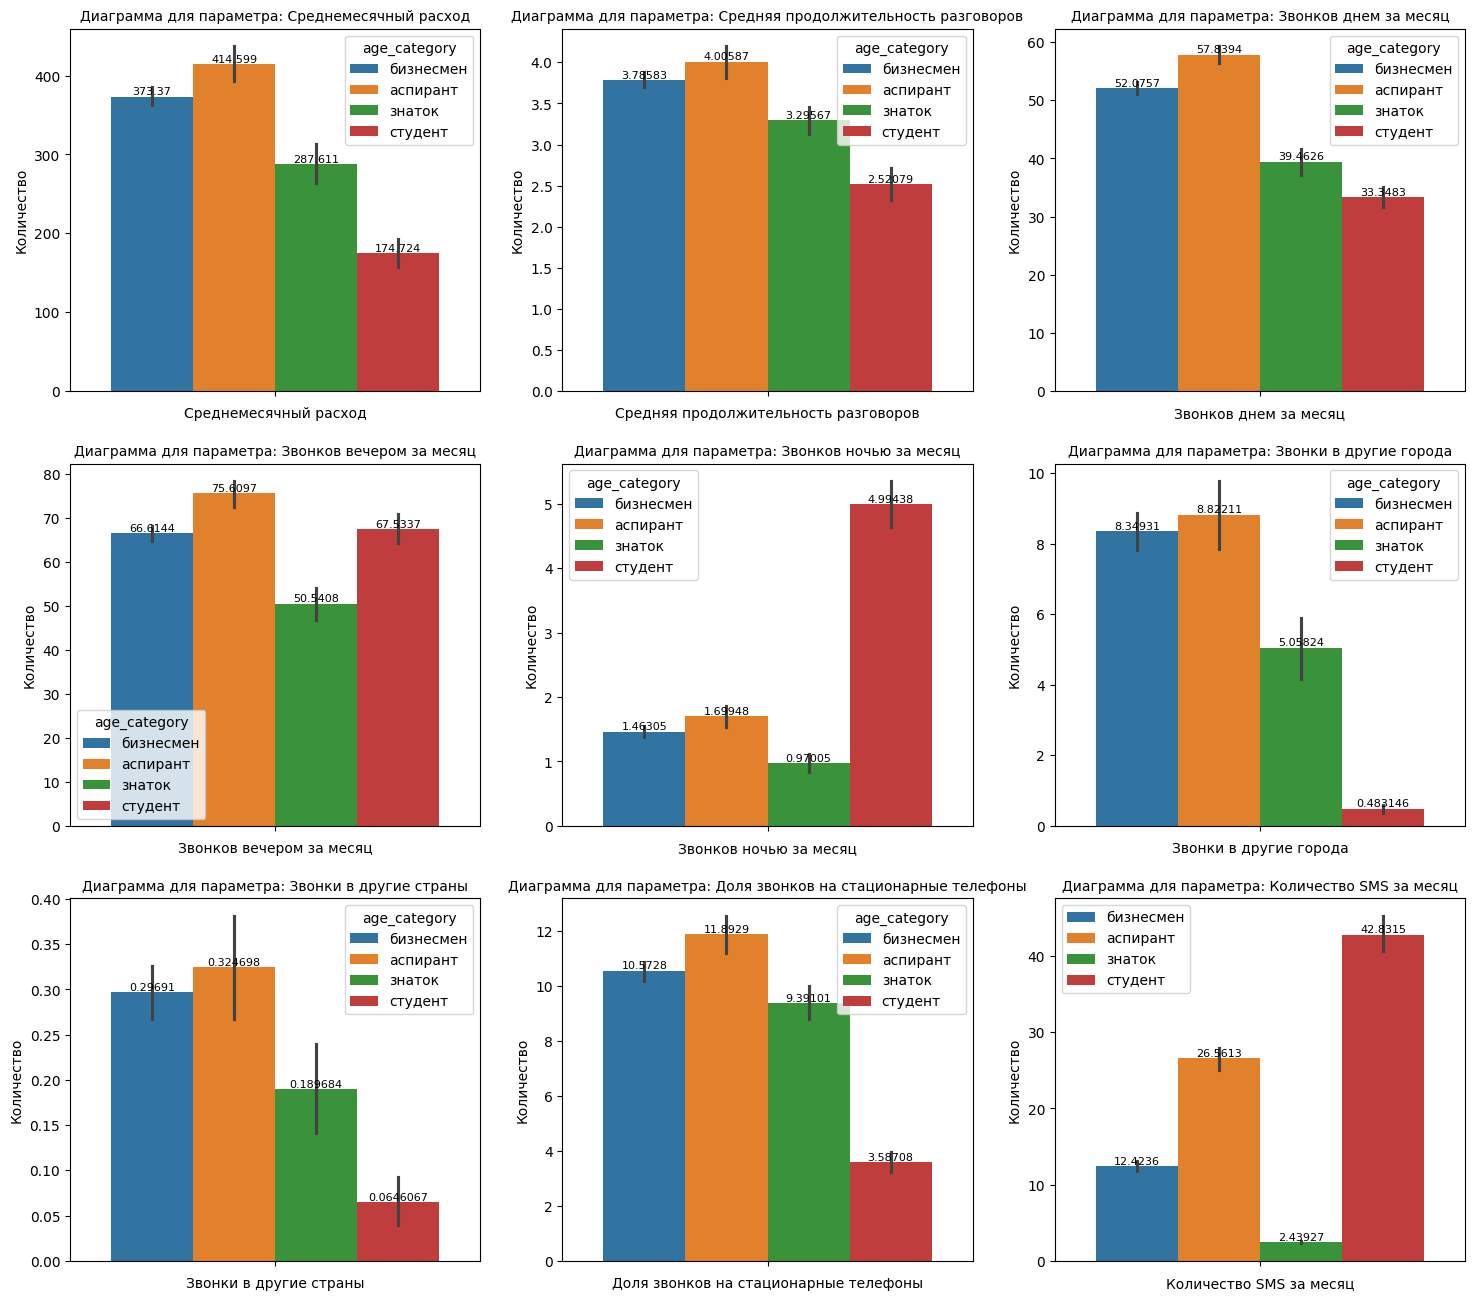

In [36]:
lst_cont = ['avg_month_time', 'avg_call_time', 'month_day_time',
            'month_evening_time', 'month_night_time', 'out_city_call',
            'out_country_call', 'landline_call_perc', 'month_sms_count']

plt.subplots(3, 3, figsize = (18,16))

for index, col in enumerate(lst_cont, start = 1):
    plt.subplot(3, 3, index)
    ax = sns.barplot(data=df,
                      y=df[col],
                      hue = df['age_category']#,
                      #legend= 'brief'
                      )

    ax.set_xlabel(f'{dct_columns[col]}')
    ax.set_ylabel('Количество')
    ax.set_title(f'Диаграмма для параметра: {dct_columns[col]}', fontsize = 10)

    ax.bar_label(ax.containers[0], label_type='edge', fontsize = 8)
    ax.bar_label(ax.containers[1], label_type='edge', fontsize = 8)
    ax.bar_label(ax.containers[2], label_type='edge', fontsize = 8)
    ax.bar_label(ax.containers[3], label_type='edge', fontsize = 8)


plt.legend()

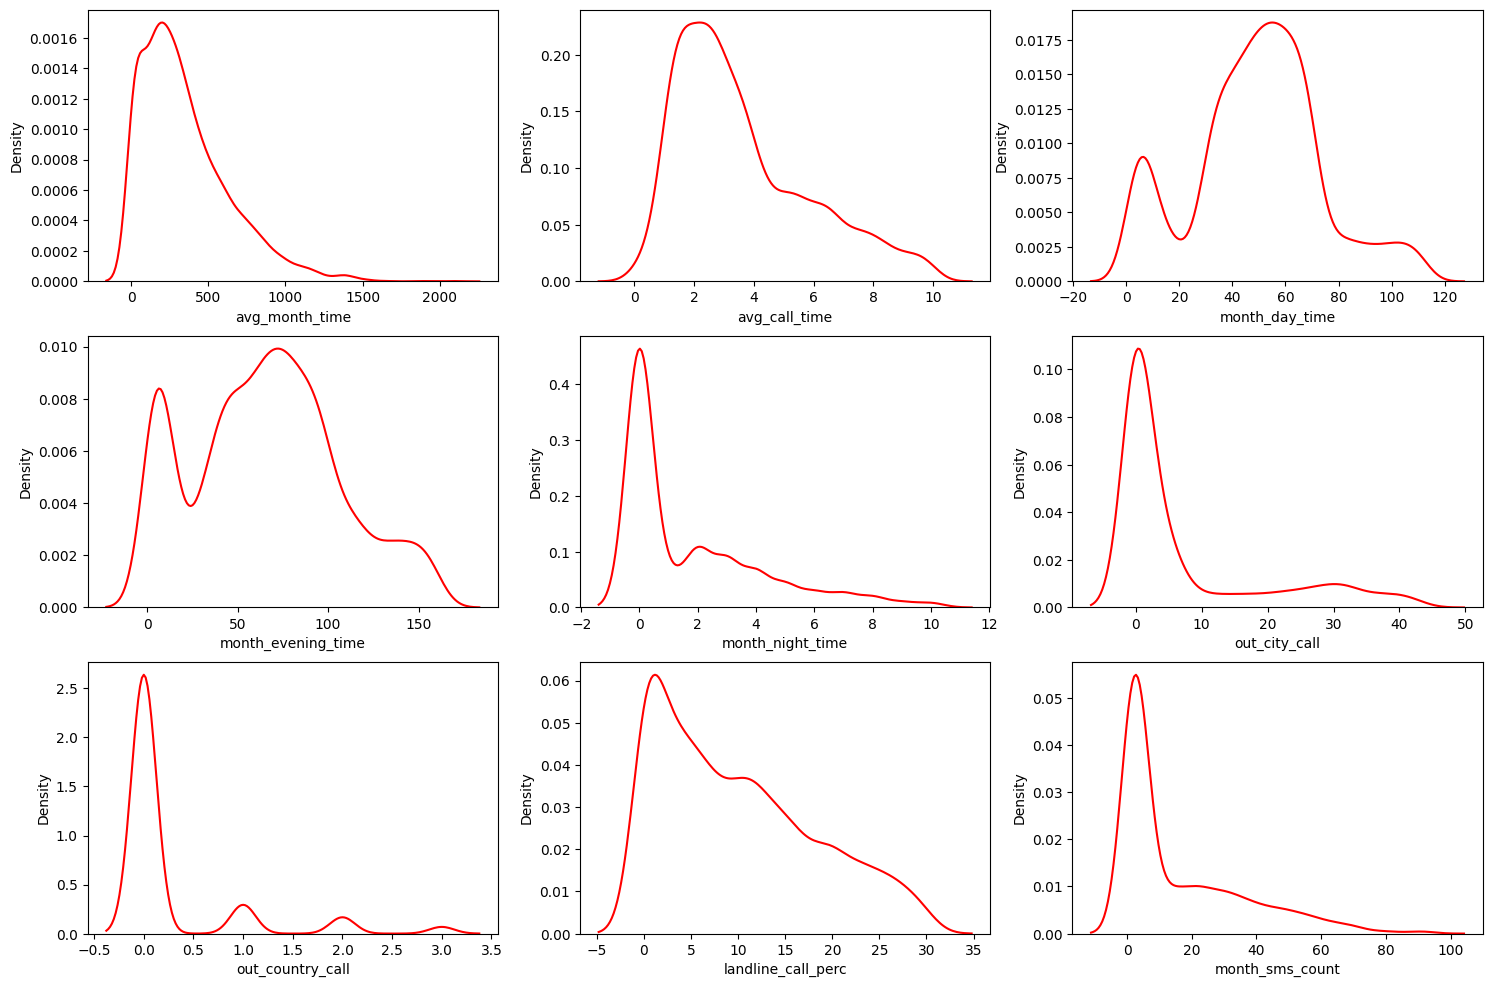

In [37]:
lst_cont = ['avg_month_time', 'avg_call_time', 'month_day_time',
            'month_evening_time', 'month_night_time', 'out_city_call',
            'out_country_call', 'landline_call_perc', 'month_sms_count']
plt.subplots(3,3, figsize = (18,12))
for index, col in enumerate(lst_cont, start = 1):
    plt.subplot(3, 3, index)
    ax = sns.kdeplot(data=df,
                     x=col,
                     color='red')

##### Выводы
Тип пользователей 'аспирант' в целом пользуется услугами компании в большем объеме, чем другие, недалеко расположен и тип пользлвателей 'бизнесмен', при этом оба типа малоактивны в ночное время.

Тип пользователей 'студент' активнее всех пользуется sms-сообщениями и ночными звонками, а также перегоняет тип 'бизнесмен' в вечернее время, а звонки за переделы города пользуются у этого типа клиентов невысоким спросом.

Тип 'знаток' малоактивен в ночное время и относительно редко пользуется sms-сообщениями

In [38]:
df.head(2)

,age,avg_month_time,avg_call_time,month_day_time,month_evening_time,month_night_time,out_city_call,out_country_call,landline_call_perc,month_sms_count,activation_date,age_category,activation_year,activation_month,activation_data
0,41,113.70,2.1,41.0,27.0,0.0,0.0,0,1.0,36.0,2015-03-26 11:26:15,бизнесмен,2015,2015-03-01,2015-03-26
1,35,410.23,5.6,47.0,49.0,0.0,0.0,0,11.0,23.0,2016-01-04 15:53:20,бизнесмен,2016,2016-01-01,2016-01-04


##### ТОП-2:
  
Совпадают ли результаты с предыдущем пунктом;
Какие выводы можно сделать?

In [39]:
# больше всего в среднем в месяц тратят на оплату услуг связи те, кьто много разговаривает

df.groupby('age_category').agg(много_говорят_платят= ('avg_month_time', 'mean'))\
                                        .reset_index()\
                                        .sort_values(by='много_говорят_платят',
                                                     ascending=False).round(2).head(2)

,age_category,много_говорят_платят
0,аспирант,414.60
1,бизнесмен,373.37


In [40]:
# больше всего по количеству звонков в месяц днем, вечером и ночью (считаем средние значения )

df_dtalk = df.groupby('age_category').agg(day_talk= ('month_day_time', 'mean'))\
                                        .reset_index()\
                                        .sort_values(by='day_talk',
                                                     ascending=False).round(2).head(2)

df_etalk = df.groupby('age_category').agg(evening_talk= ('month_evening_time', 'mean'))\
                                        .reset_index()\
                                        .sort_values(by='evening_talk',
                                                     ascending=False).round(2).head(2)

df_ntalk = df.groupby('age_category').agg(night_talk= ('month_night_time', 'mean'))\
                                        .reset_index()\
                                        .sort_values(by='night_talk',
                                                     ascending=False).round(2).head(2)

In [41]:
df_etalk

,age_category,evening_talk
0,аспирант,75.61
3,студент,67.53


In [42]:
# больше всего по количеству звонков в месяц днем, вечером и ночью (считаем средние значения )

df['day_call_dur'] = df.avg_call_time * df.month_day_time
df['evrning_call_dur'] = df.avg_call_time * df.month_evening_time
df['night_call_dur'] = df.avg_call_time * df.month_night_time

df_dtotal = df.groupby('age_category').agg(day_total= ('day_call_dur', 'mean'))\
                                        .reset_index()\
                                        .sort_values(by='day_total',
                                                     ascending=False).round(2).head(2)

df_etotal = df.groupby('age_category').agg(evening_total= ('evrning_call_dur', 'mean'))\
                                        .reset_index()\
                                        .sort_values(by='evening_total',
                                                     ascending=False).round(2).head(2)

df_ntotal = df.groupby('age_category').agg(night_total= ('night_call_dur', 'mean'))\
                                        .reset_index()\
                                        .sort_values(by='night_total',
                                                     ascending=False).round(2).head(2)

In [43]:
df_etotal

,age_category,evening_total
0,аспирант,305.80
1,бизнесмен,270.95


[Text(0, 0, '7')]

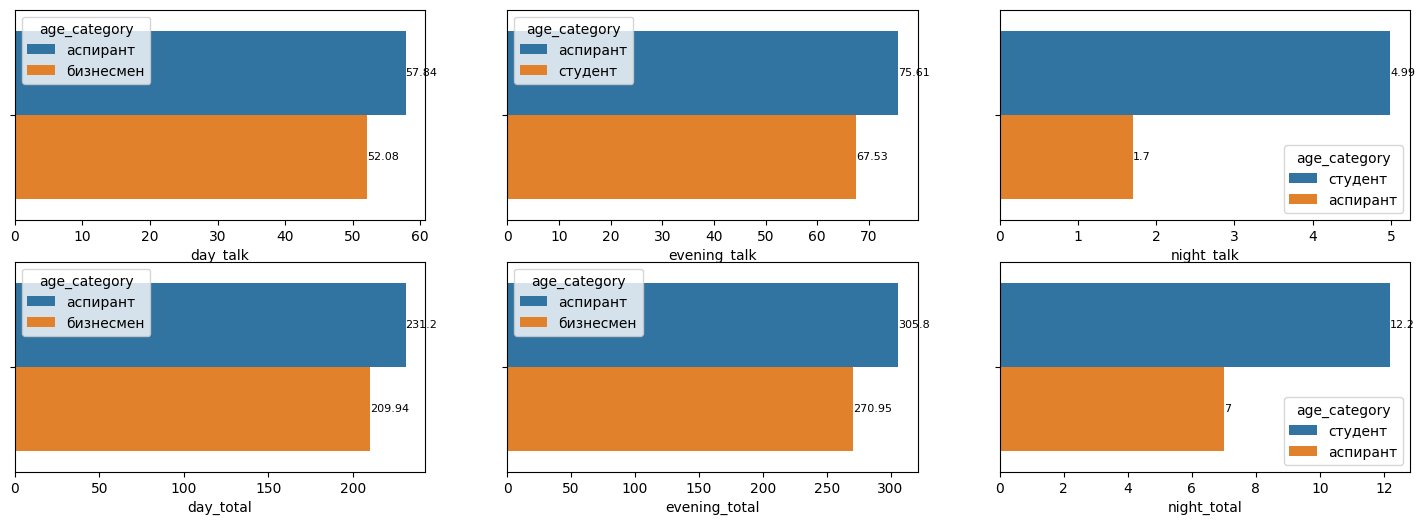

In [44]:
plt.subplots(2, 3, figsize = (18,6))
plt.subplot(2, 3, 1)
ax = sns.barplot(data=df_dtalk.head(2),
                 x = df_dtalk['day_talk'],
                 hue='age_category')
ax.bar_label(ax.containers[0], label_type='edge', fontsize = 8)
ax.bar_label(ax.containers[1], label_type='edge', fontsize = 8)

plt.subplot(2, 3, 2)
ax = sns.barplot(data=df_etalk.head(2),
                 x = df_etalk['evening_talk'],
                 hue='age_category')
ax.bar_label(ax.containers[0], label_type='edge', fontsize = 8)
ax.bar_label(ax.containers[1], label_type='edge', fontsize = 8)

plt.subplot(2, 3, 3)
ax = sns.barplot(data=df_ntalk.head(2),
                 x = df_ntalk['night_talk'],
                 hue='age_category')
ax.bar_label(ax.containers[0], label_type='edge', fontsize = 8)
ax.bar_label(ax.containers[1], label_type='edge', fontsize = 8)

plt.subplot(2, 3, 4)
ax = sns.barplot(data=df_dtotal.head(2),
                 x = df_dtotal['day_total'],
                 hue='age_category')
ax.bar_label(ax.containers[0], label_type='edge', fontsize = 8)
ax.bar_label(ax.containers[1], label_type='edge', fontsize = 8)

plt.subplot(2, 3, 5)
ax = sns.barplot(data=df_etotal.head(2),
                 x = df_etotal['evening_total'],
                 hue='age_category')
ax.bar_label(ax.containers[0], label_type='edge', fontsize = 8)
ax.bar_label(ax.containers[1], label_type='edge', fontsize = 8)

plt.subplot(2, 3, 6)
ax = sns.barplot(data=df_ntotal.head(2),
                 x = df_ntotal['night_total'],
                 hue='age_category')
ax.bar_label(ax.containers[0], label_type='edge', fontsize = 8)
ax.bar_label(ax.containers[1], label_type='edge', fontsize = 8)


##### Выводы:

При добавлении дополнительной информации (общая сумма звонков днем,вечером иночью) мы видим, что, несмотря на активность типов 'студент' и 'аспирант' в вечернее время, тип 'бизнесмен' в сумме общается больше, чем тип 'студент'

А разница общения в ночное время у типов 'студент' и 'аспирант' уже не кажется такой большой.